In [14]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import pandas as pd
import os
import noisereduce as nr

In [15]:
# Path to the directory containing audio files
audio_dir = 'audio'

# Path to the metadata CSV file
metadata_file = 'meta/esc50.csv'

# List of animal labels to include
animal_labels = ['dog', 'cat', 'rooster', 'hen', 'pig', 'frog', 'cow', 'crow']

# Load metadata into a Pandas dataframe
metadata = pd.read_csv(metadata_file)

# Filter metadata to include only audio files labeled as one of the animal labels
animal_metadata = metadata[metadata['category'].isin(animal_labels)]

# Get list of audio filenames for filtered metadata
animal_files = animal_metadata['filename'].tolist()

# Create a new dataframe to store the paths and labels
animal_data = pd.DataFrame({'animal': animal_metadata['category'], 'file': animal_files})

In [16]:
FRAME_SIZE = 2048
HOP_SIZE = 512

# compute the magnitude spectrum of the signal
def spectrum(signal):

    # Apply Fast Fourier Transform to the signal.
    # After apply fft, we will get a complex number (c = a + bi) for each frequency (from 0 to sample rate/2).
    # The real part (a) represents the magnitude of the frequency, which is the amplitude associated with the frequency.

    X = np.fft.fft(signal)
    X_magnitude = np.absolute(X)

    return X_magnitude

# plot the magnitude spectrum of the signal
def plot_magnitude_spectrum(signal, sr, title, f_ratio=0.5):
    X = np.fft.fft(signal)
    X_magnitude = np.absolute(X)
    print(X_magnitude)
    
    plt.figure(figsize=(18, 5))
    
    f = np.linspace(0, sr, len(X_magnitude))
    f_bins = int(len(X_magnitude)*f_ratio)  
    
    plt.plot(f[:f_bins], X_magnitude[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)

#compute specgram
def compute_specgram(x, FRAME_SIZE, HOP_SIZE):
    X = librosa.stft(x, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
    Xdb = librosa.amplitude_to_db(np.abs(X))
    return Xdb

#plot specgram
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f db")

#compute mfcc
def compute_mfcc(audio_path):
    x, sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(x, sr=sr)
    return mfccs


In [17]:
cat_data = animal_data[animal_data['animal'] == 'cat']
cow_data = animal_data[animal_data['animal'] == 'cow']
frog_data = animal_data[animal_data['animal'] == 'frog']

In [18]:
cat, sr = librosa.load(audio_dir + cat_data.iloc[0]['file'])
cat = nr.reduce_noise(cat, sr)
cow, sr = librosa.load(audio_dir + cow_data.iloc[0]['file'])
cow = nr.reduce_noise(cow, sr)
frog, sr = librosa.load(audio_dir + frog_data.iloc[0]['file'])
frog = nr.reduce_noise(frog, sr)

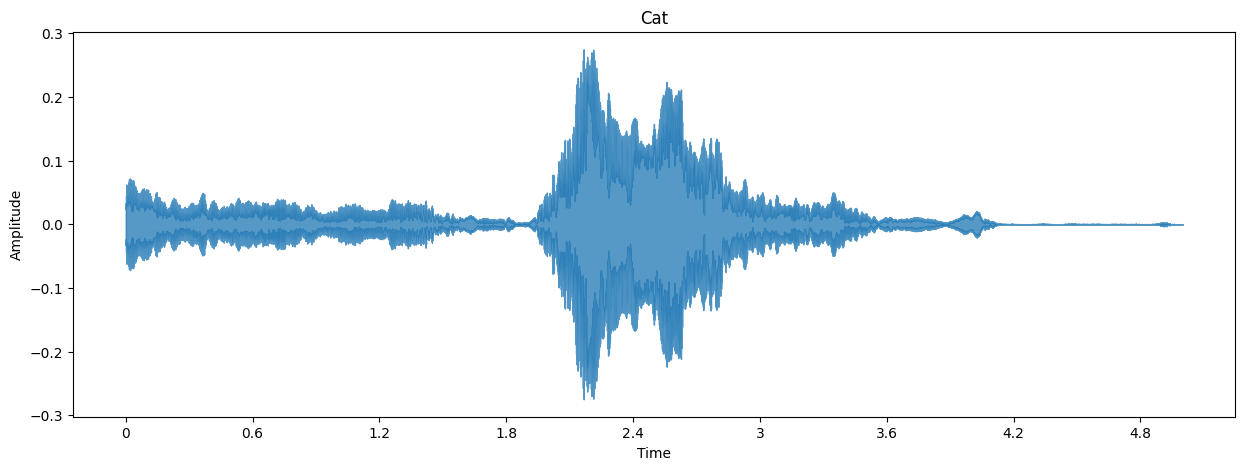

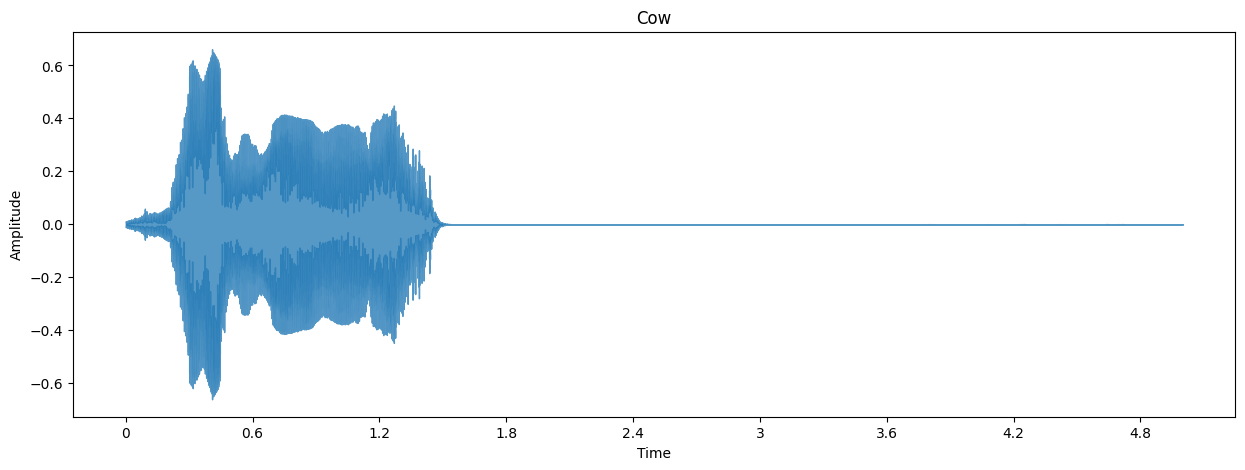

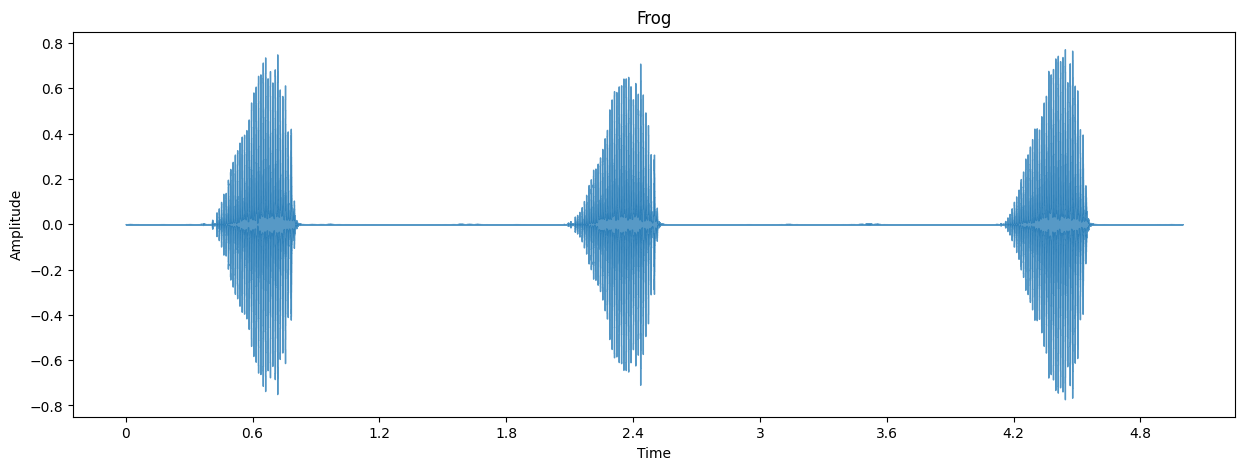

In [19]:
# Plotting waveplot with amplitude vs time

plt.figure(figsize=(15, 5))
librosa.display.waveshow(cat, sr=sr, alpha=0.75)
plt.ylabel('Amplitude')
plt.title('Cat')
plt.show()

plt.figure(figsize=(15, 5))
librosa.display.waveshow(cow, sr=sr, alpha=0.75)
plt.ylabel('Amplitude')
plt.title('Cow')
plt.show()

plt.figure(figsize=(15, 5))
librosa.display.waveshow(frog, sr=sr, alpha=0.75)
plt.ylabel('Amplitude')
plt.title('Frog')
plt.show()

In [20]:
ipd.Audio(cat, rate=sr)

In [21]:
ipd.Audio(cow, rate=sr)

In [22]:
ipd.Audio(frog, rate=sr)

[7.25139772 2.85623729 1.85539874 ... 0.95973401 1.85539874 2.85623729]
[12.82916551 10.92602129  7.07606015 ...  3.89477175  7.07606015
 10.92602129]
[5.42371296 1.22052442 0.8256592  ... 0.73644871 0.8256592  1.22052442]


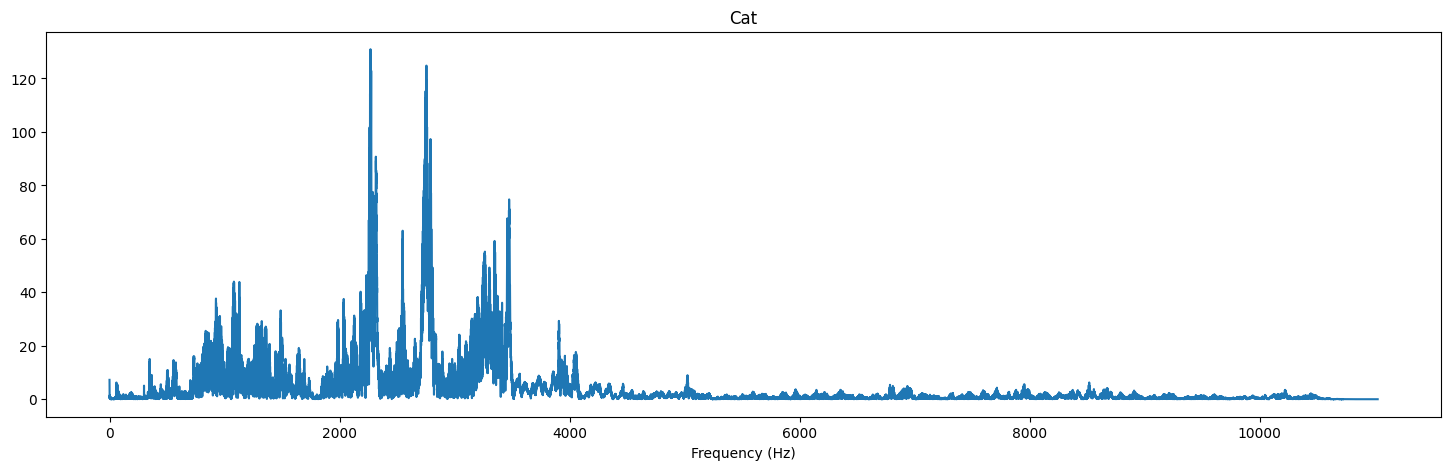

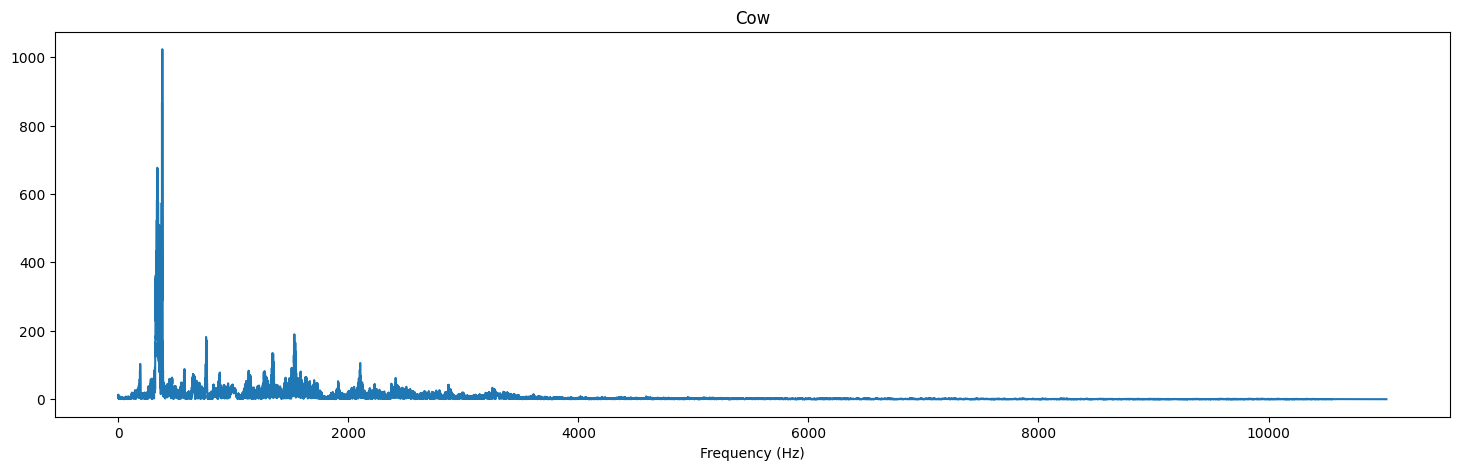

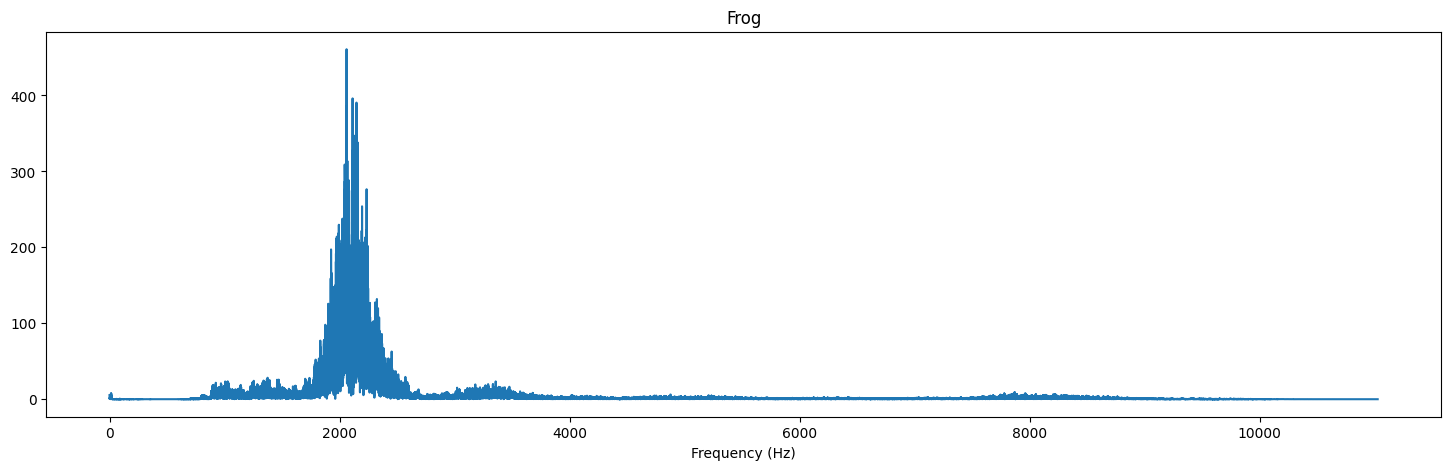

In [23]:
cat_spectrum = spectrum(cat)
cow_spectrum = spectrum(cow)
frog_spectrum = spectrum(frog)

# Plotting specgram with amplitude vs frequency
plot_magnitude_spectrum(cat, sr, 'Cat', f_ratio=0.5)
plot_magnitude_spectrum(cow, sr, 'Cow', f_ratio=0.5)
plot_magnitude_spectrum(frog, sr, 'Frog', f_ratio=0.5)

In [24]:
cat_specgram = compute_specgram(cat, FRAME_SIZE, HOP_SIZE)
cow_specgram = compute_specgram(cow, FRAME_SIZE, HOP_SIZE)
frog_specgram = compute_specgram(frog, FRAME_SIZE, HOP_SIZE)

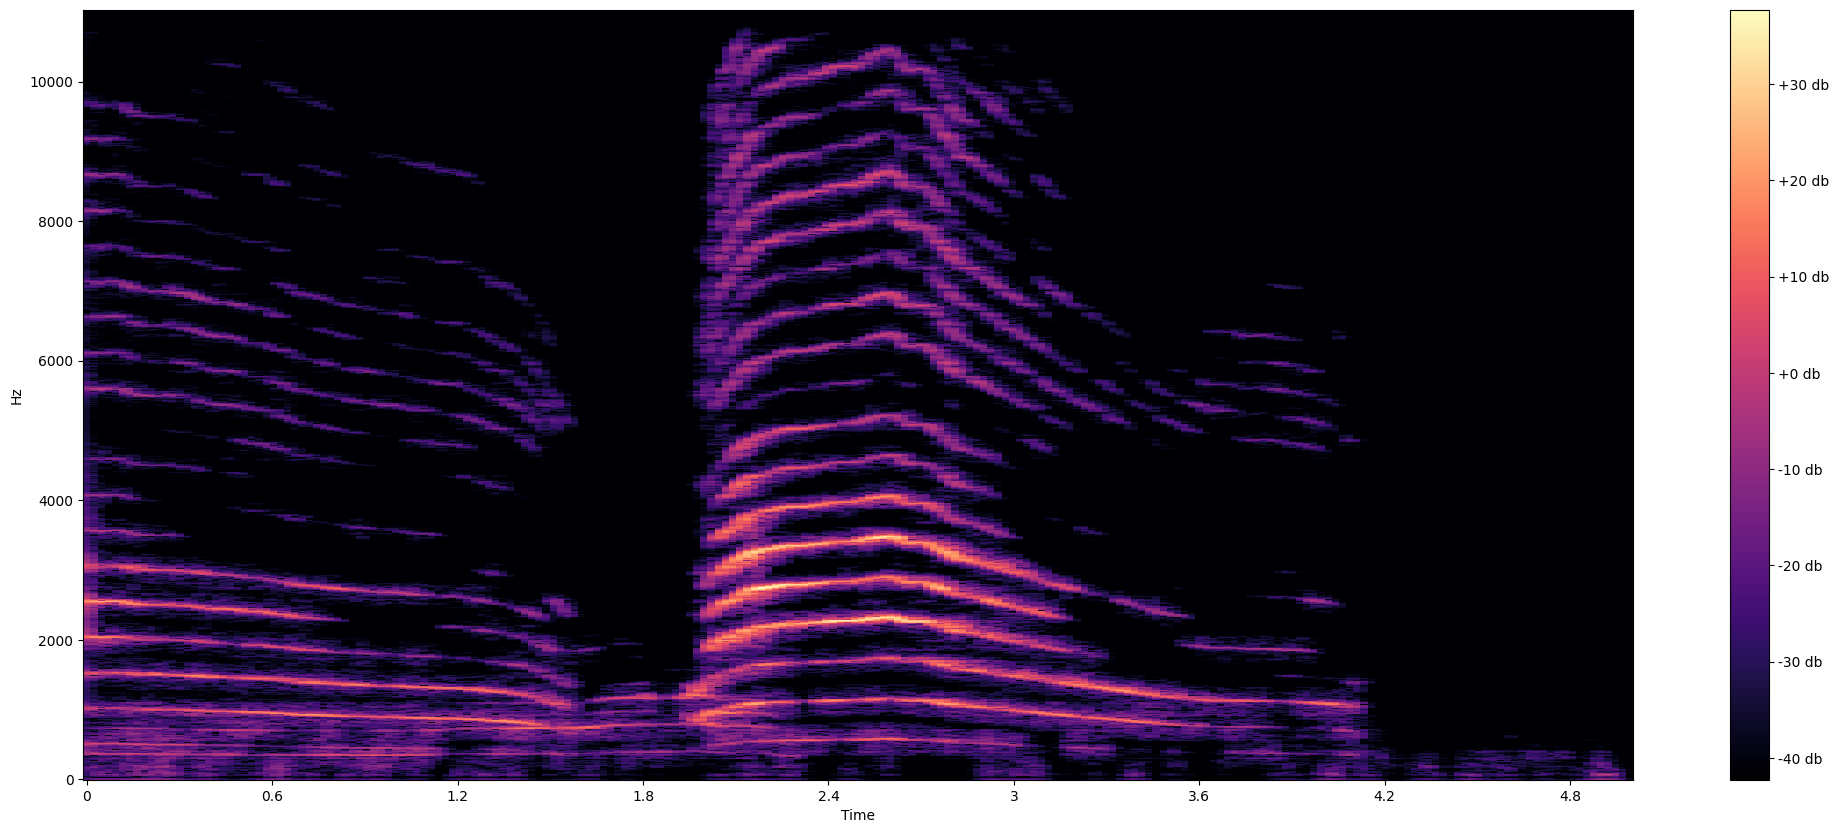

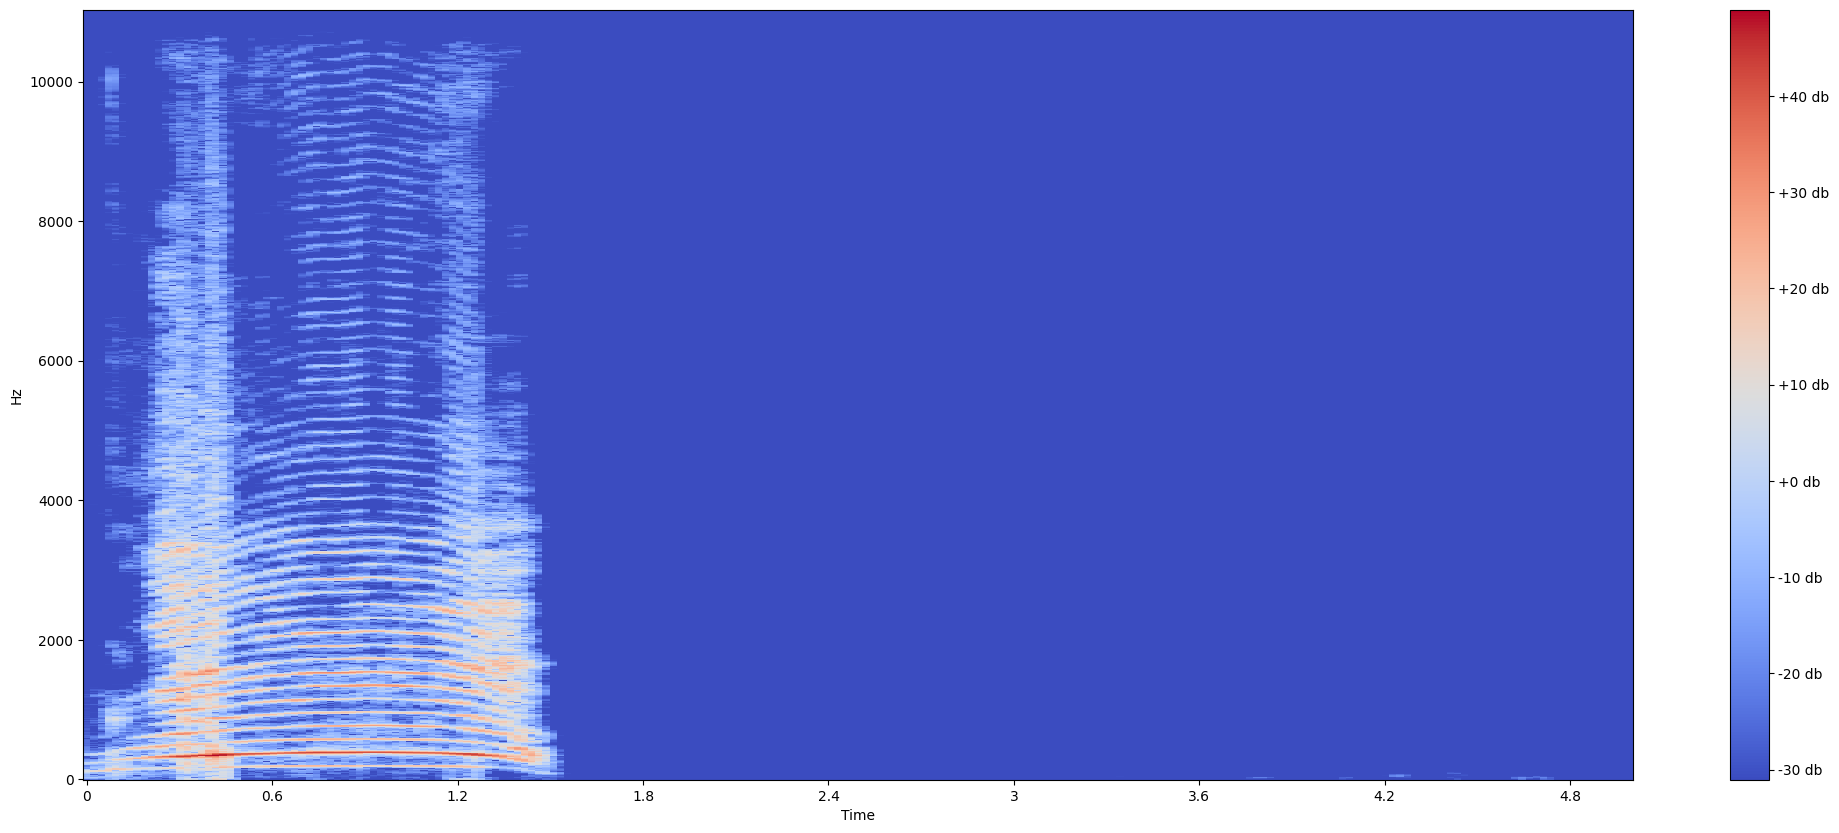

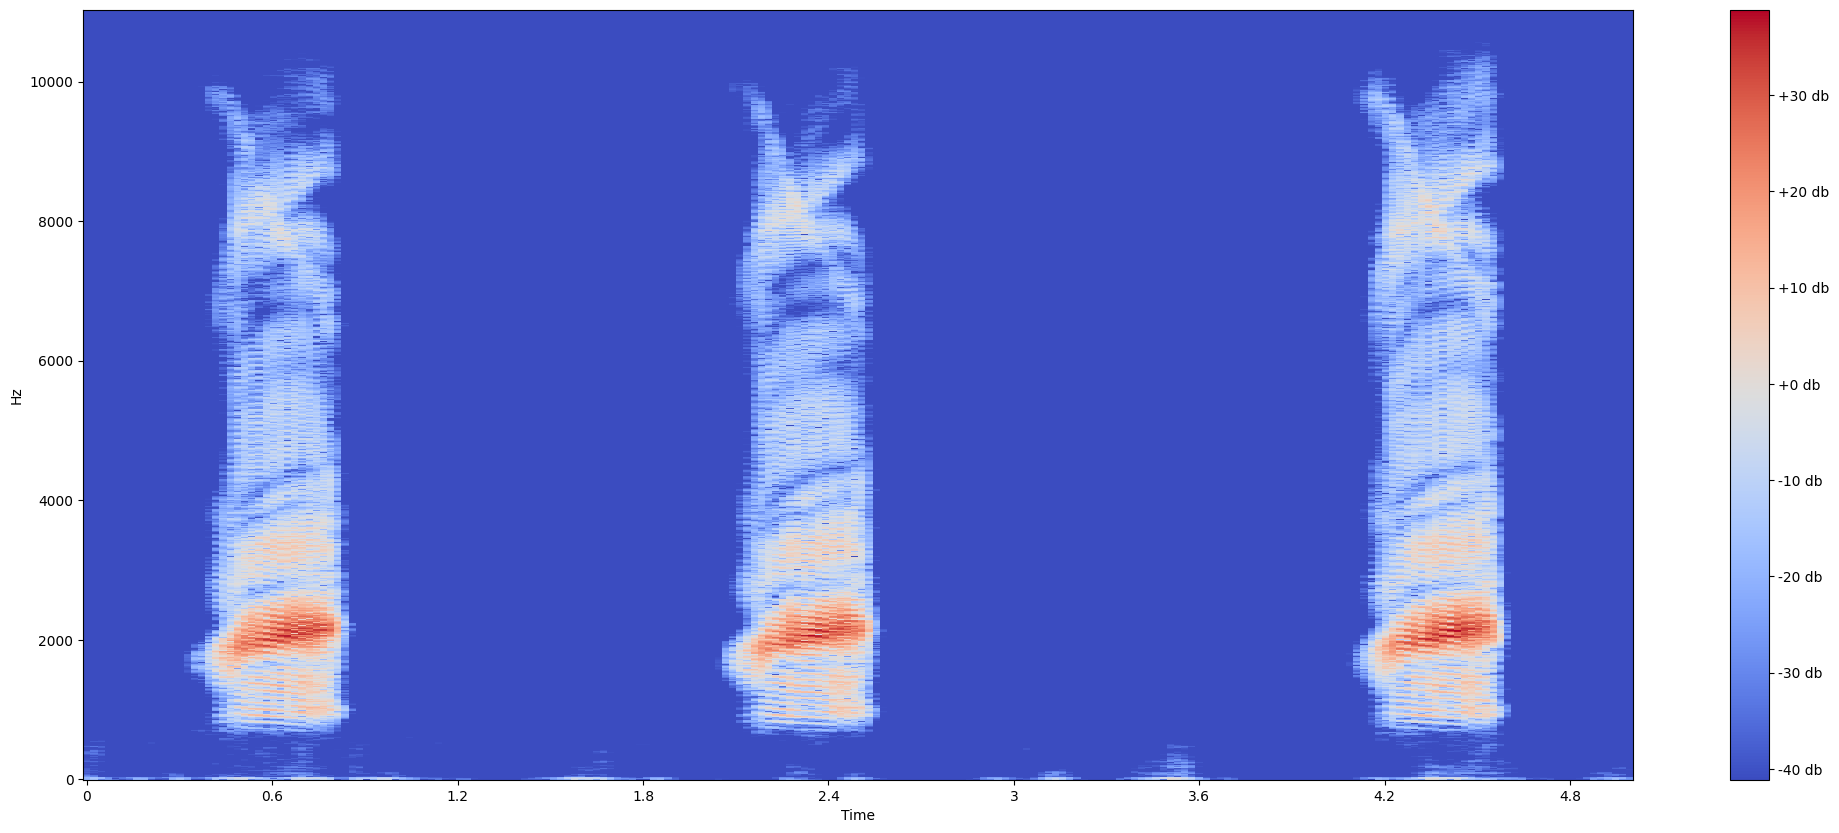

In [25]:
plot_spectrogram(cat_specgram, sr=sr, hop_length=HOP_SIZE)
plot_spectrogram(cow_specgram, sr=sr, hop_length=HOP_SIZE)
plot_spectrogram(frog_specgram, sr=sr, hop_length=HOP_SIZE)

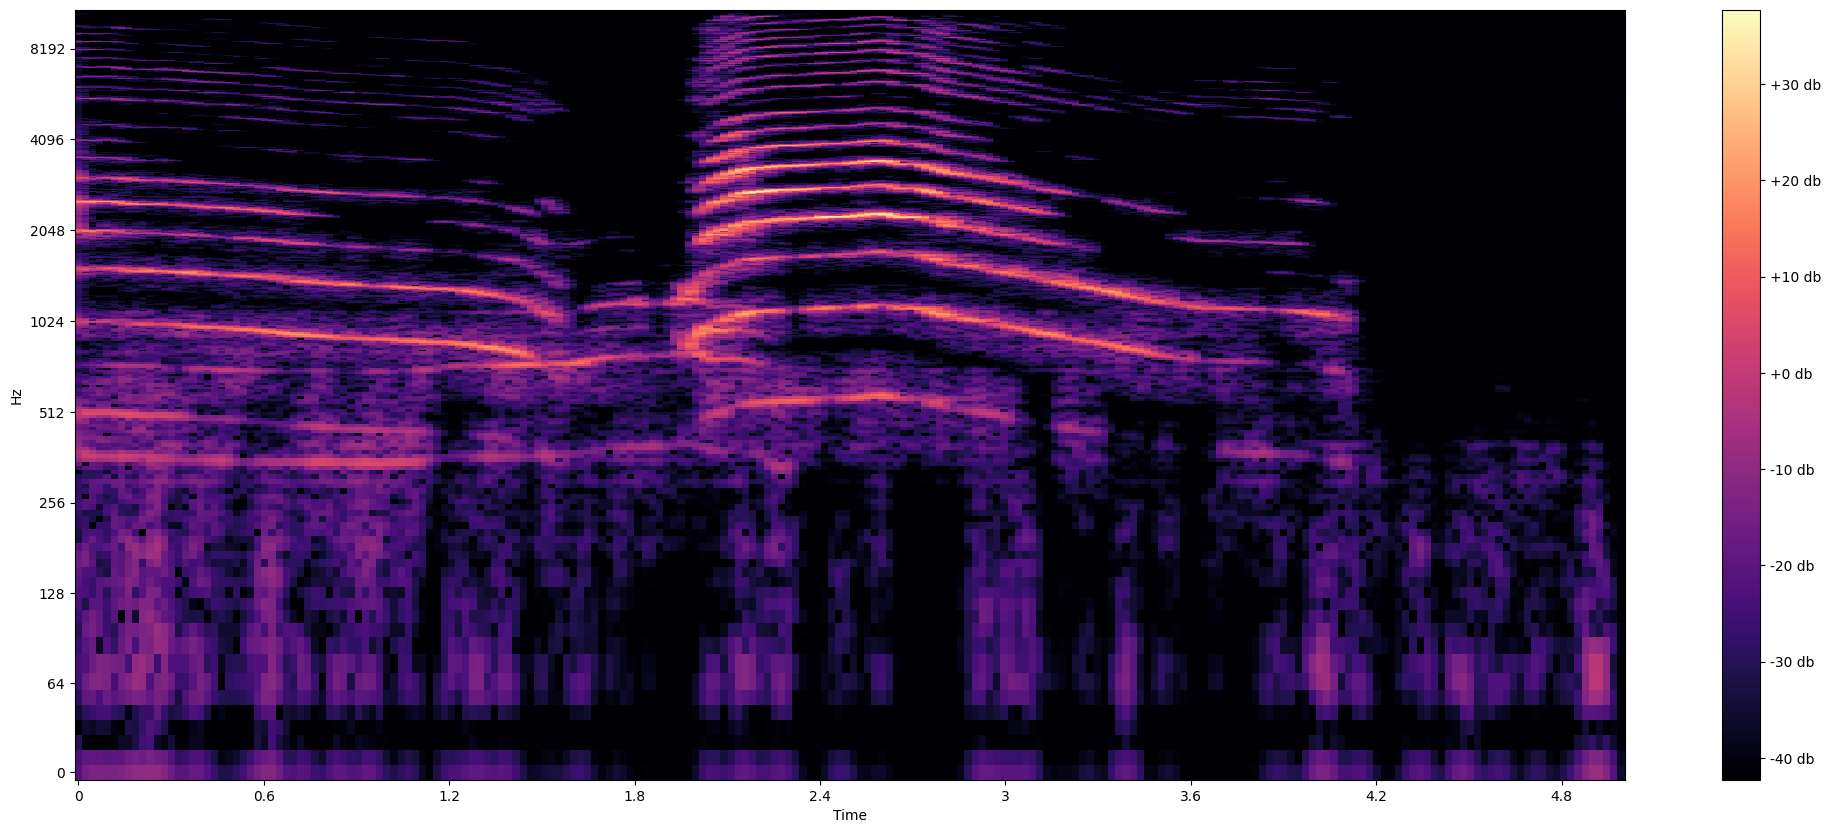

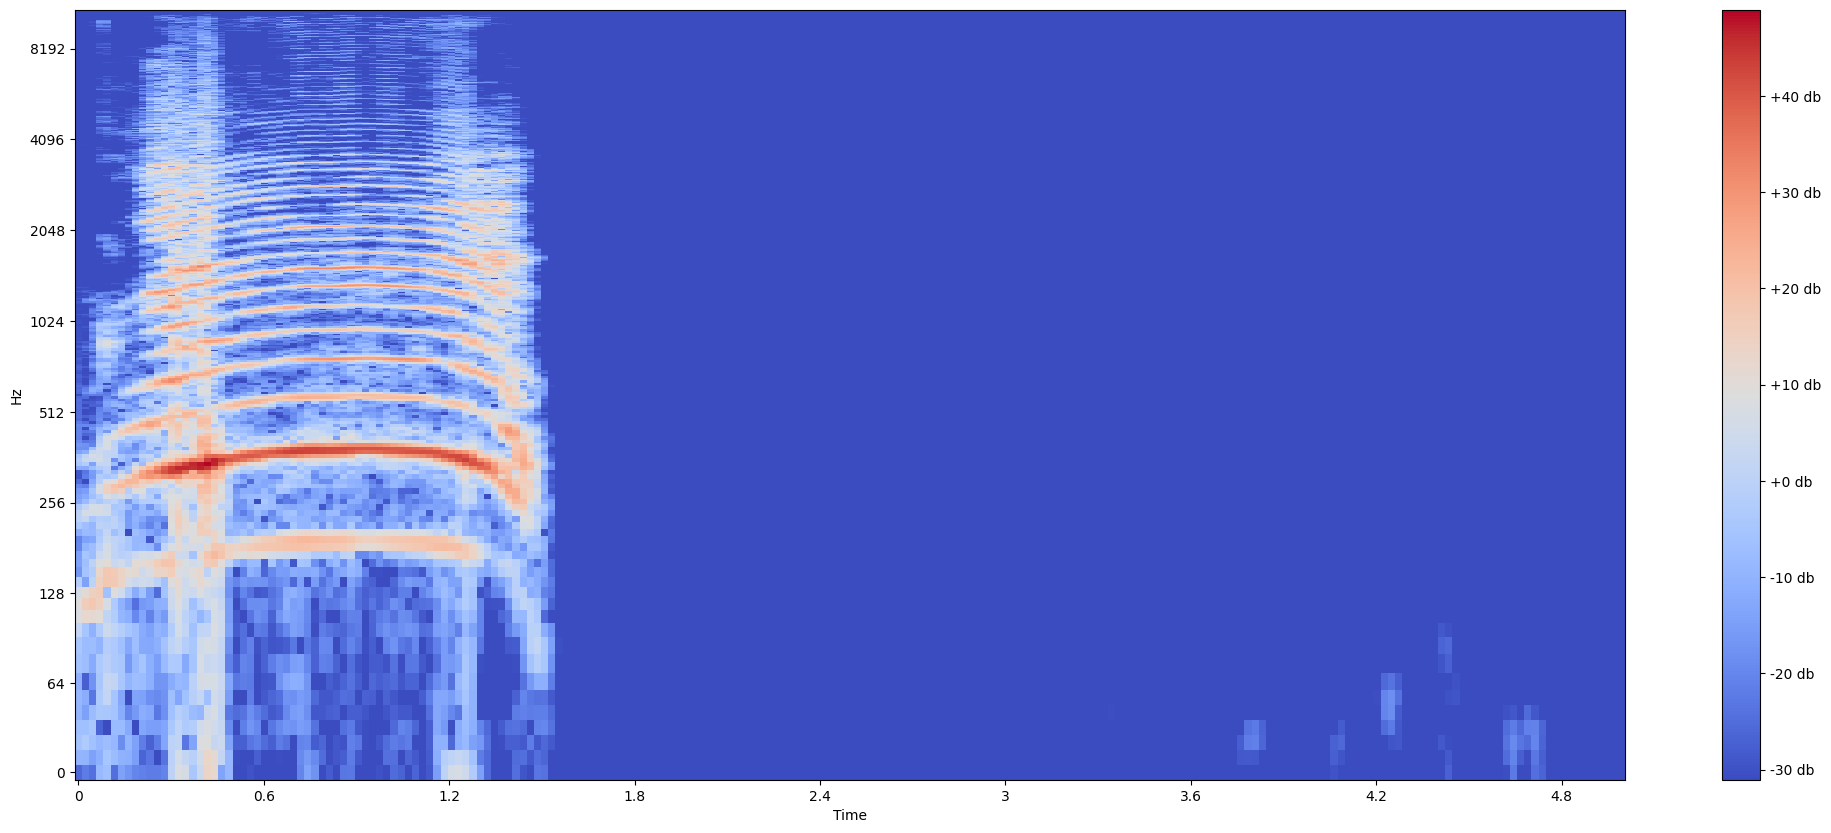

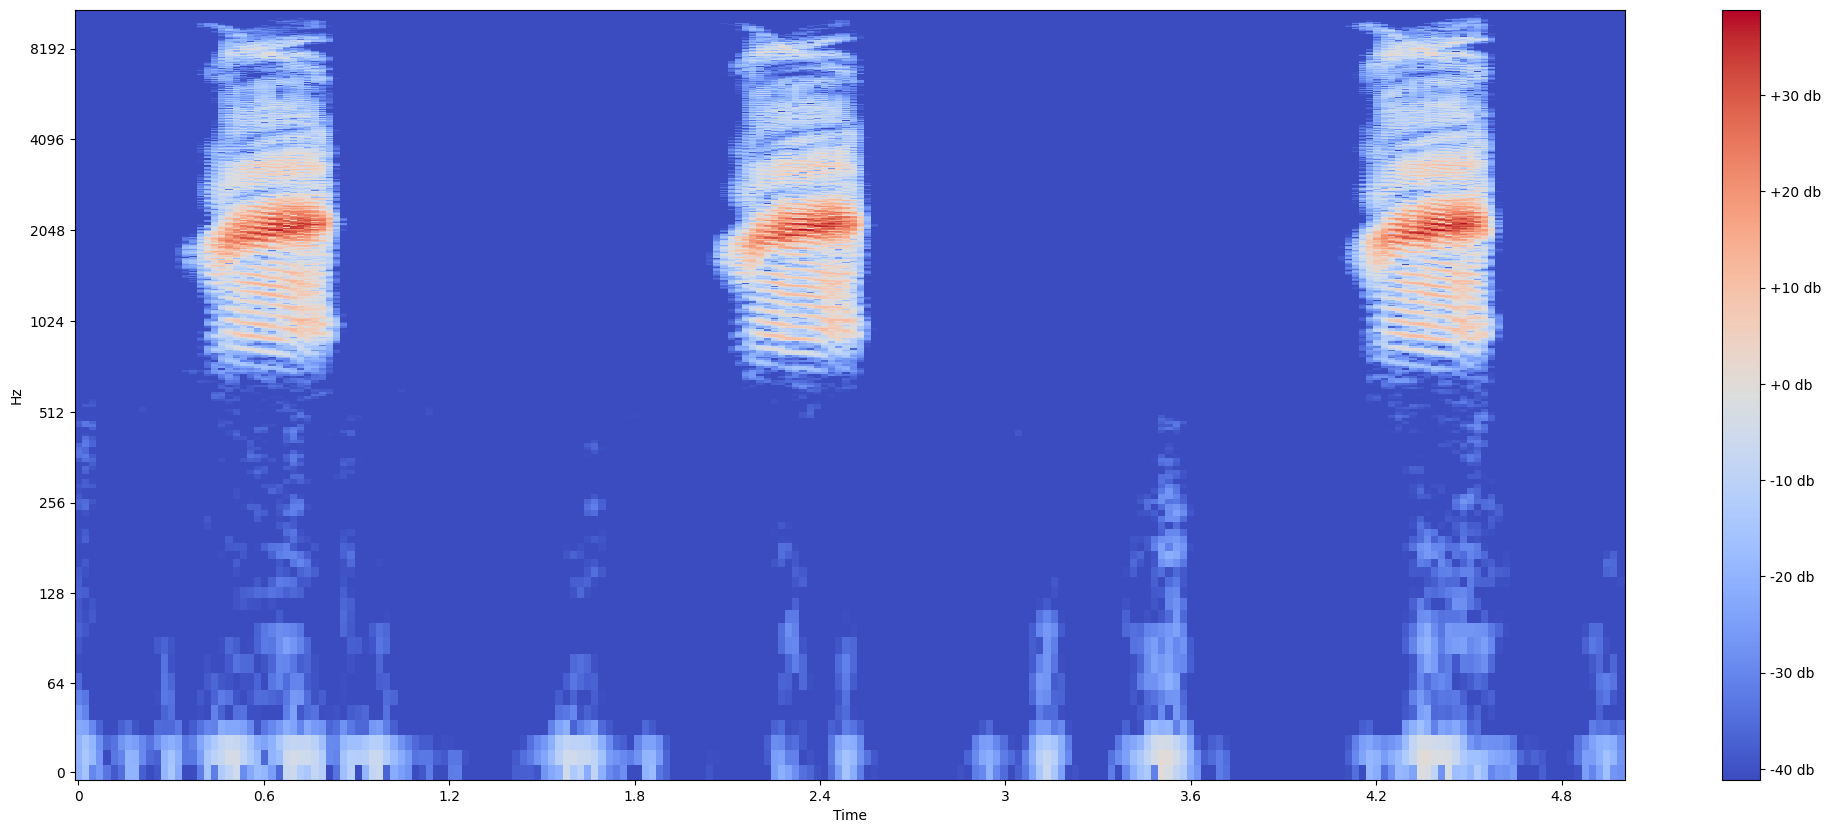

In [26]:
plot_spectrogram(cat_specgram, sr=sr, hop_length=HOP_SIZE, y_axis="log")
plot_spectrogram(cow_specgram, sr=sr, hop_length=HOP_SIZE, y_axis="log")
plot_spectrogram(frog_specgram, sr=sr, hop_length=HOP_SIZE, y_axis="log")